# ASSIGNMENT 2
## Using DATASET 5

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from random import sample
import seaborn as sns

In [2]:
facebook_edges_filepath = "/Users/michaelmbajwa/Desktop/Semester3/ComplexNetworks/Complex-Networks_exercise-main/Datasets/Group5/Facebook-Ego/686.edges"
twitter_edges_filepath = "/Users/michaelmbajwa/Desktop/Semester3/ComplexNetworks/Complex-Networks_exercise-main/Datasets/Group5/Twitter-Ego/1435461.edges"

In [3]:
# Load the /.edges files
# Facebook is an undirected network
graphFacebook = nx.read_edgelist(facebook_edges_filepath, create_using=nx.Graph())

# Twitter is a directed network
graphTwitter = nx.read_edgelist(twitter_edges_filepath, create_using=nx.DiGraph())

In [4]:
# Basic attributes check
print("Number of nodes={}, edges={} in facebook graph.".format(graphFacebook.number_of_nodes(), graphFacebook.number_of_edges()))
print("Number of nodes={}, edges={} in Twitter graph.".format(graphTwitter.number_of_nodes(), graphTwitter.number_of_edges()))

Number of nodes=168, edges=1656 in facebook graph.
Number of nodes=129, edges=8037 in Twitter graph.


## Question A
### What is the degree distribution of the network? Please plot the distribution.

In [5]:
def get_degree_distribution(G):
    # Get degree sequence of provided Graph G
    degree_seq = sorted([d for n, d in G.degree()], reverse=True)
    degrees, degree_count = np.unique(degree_seq, return_counts=True)
    return degrees, degree_count

In [6]:
# Facebook graph degree distribution
graphFB_Degrees, graphFB_Degrees_Count = get_degree_distribution(graphFacebook)

# Twitter graph degree distribution
graphTW_Degrees, graphTW_Degrees_Count = get_degree_distribution(graphTwitter)

In [8]:
# Function for plotting and saving degree distribution
def plot_save_degree_dist(G, id, type):
    """_summary_
    Returns plot of degree distribution and saves the plot to the system
    Args:
        degrees (_type_): each degree present in the network in a list format
        deg_count (_type_): each degree count in a list format
        id (_type_): name of the network
    """
    if type == 'in_degree':
        degree_seq = sorted([d for n, d in G.in_degree()], reverse=True)
    elif type == 'out_degree':
        degree_seq = sorted([d for n, d in G.out_degree()], reverse=True)
    else:
        degree_seq = sorted([d for n, d in G.degree()], reverse=True)
    plt.figure(dpi=1200)
    sns.histplot(data=degree_seq, kde=True, binwidth=1)
    plt.ylabel("Number of Nodes")
    plt.xlabel("Degree")
    plt.margins(0)
    
    if type == '':
        plt.title("Degree Distribution for {} Network".format(id))
        plt.savefig(type + 'degDist{}.png'.format(id), transparent=False)
    else:
        plt.title(type + " Distribution for {} Network".format(id))
        plt.savefig(type[:-6] + 'degDist{}.png'.format(id), transparent=False)
    plt.show()

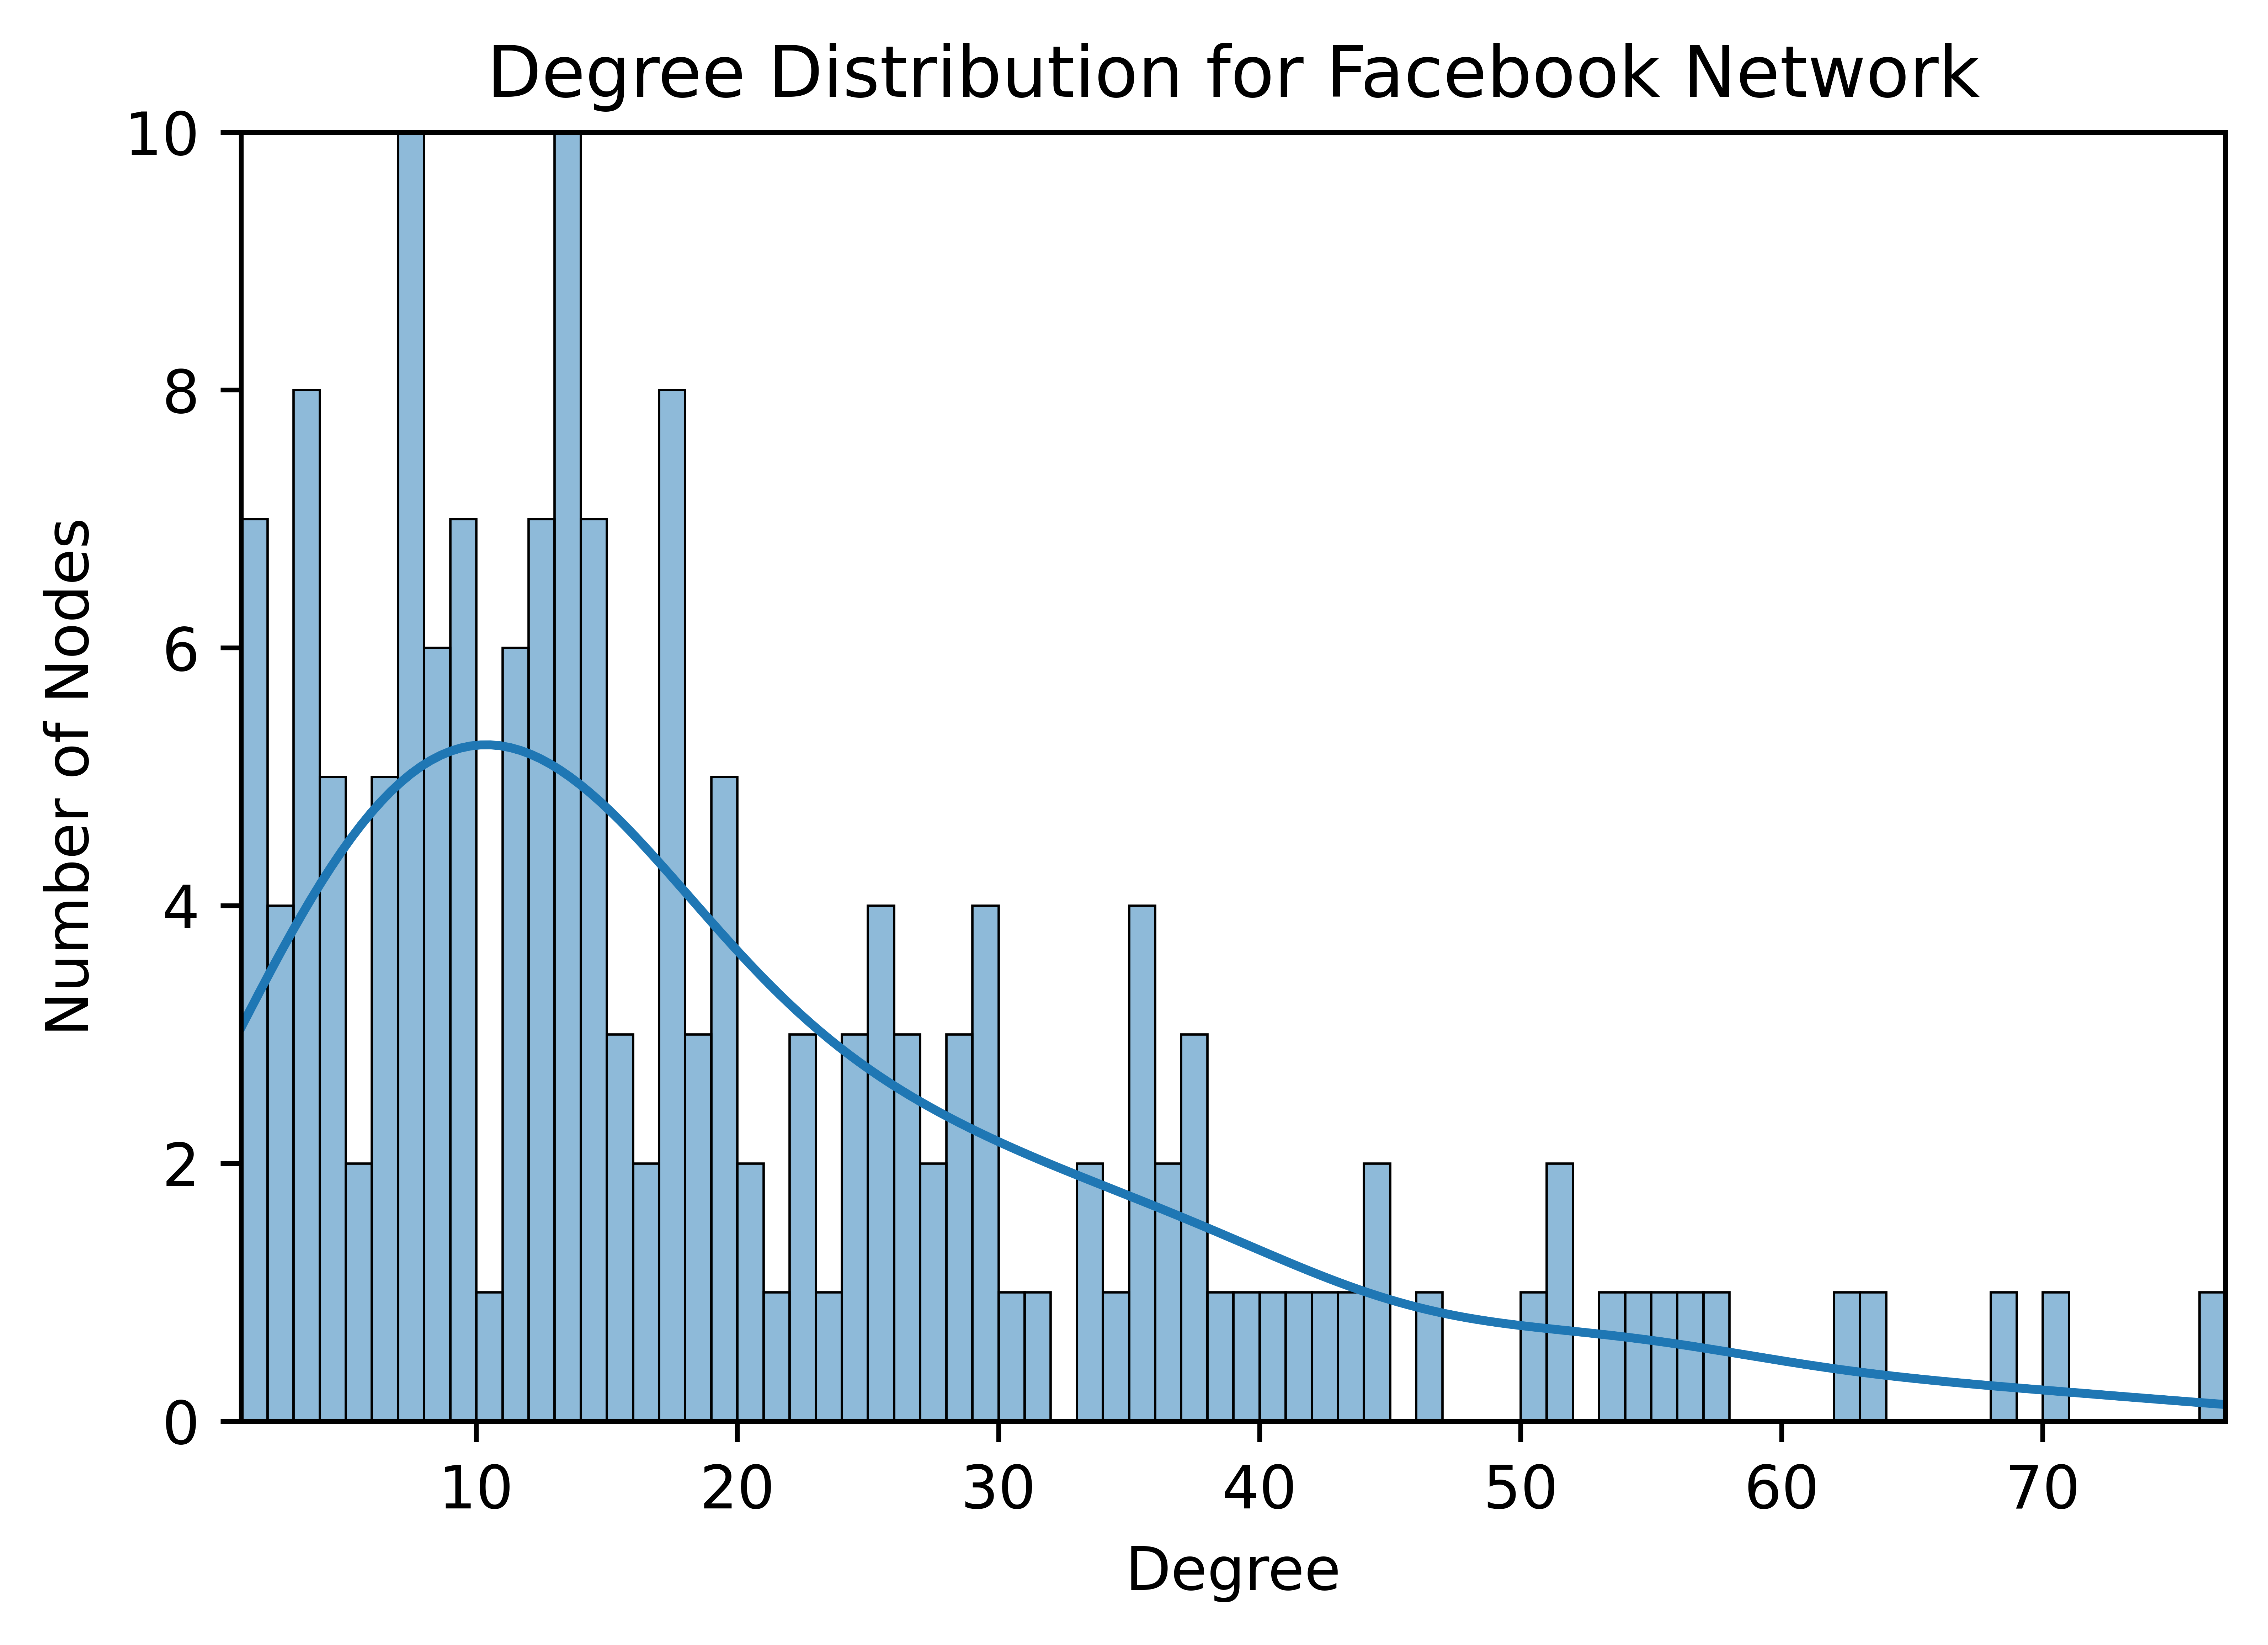

In [9]:
# For Facebook network
plot_save_degree_dist(graphFacebook, "Facebook", '')

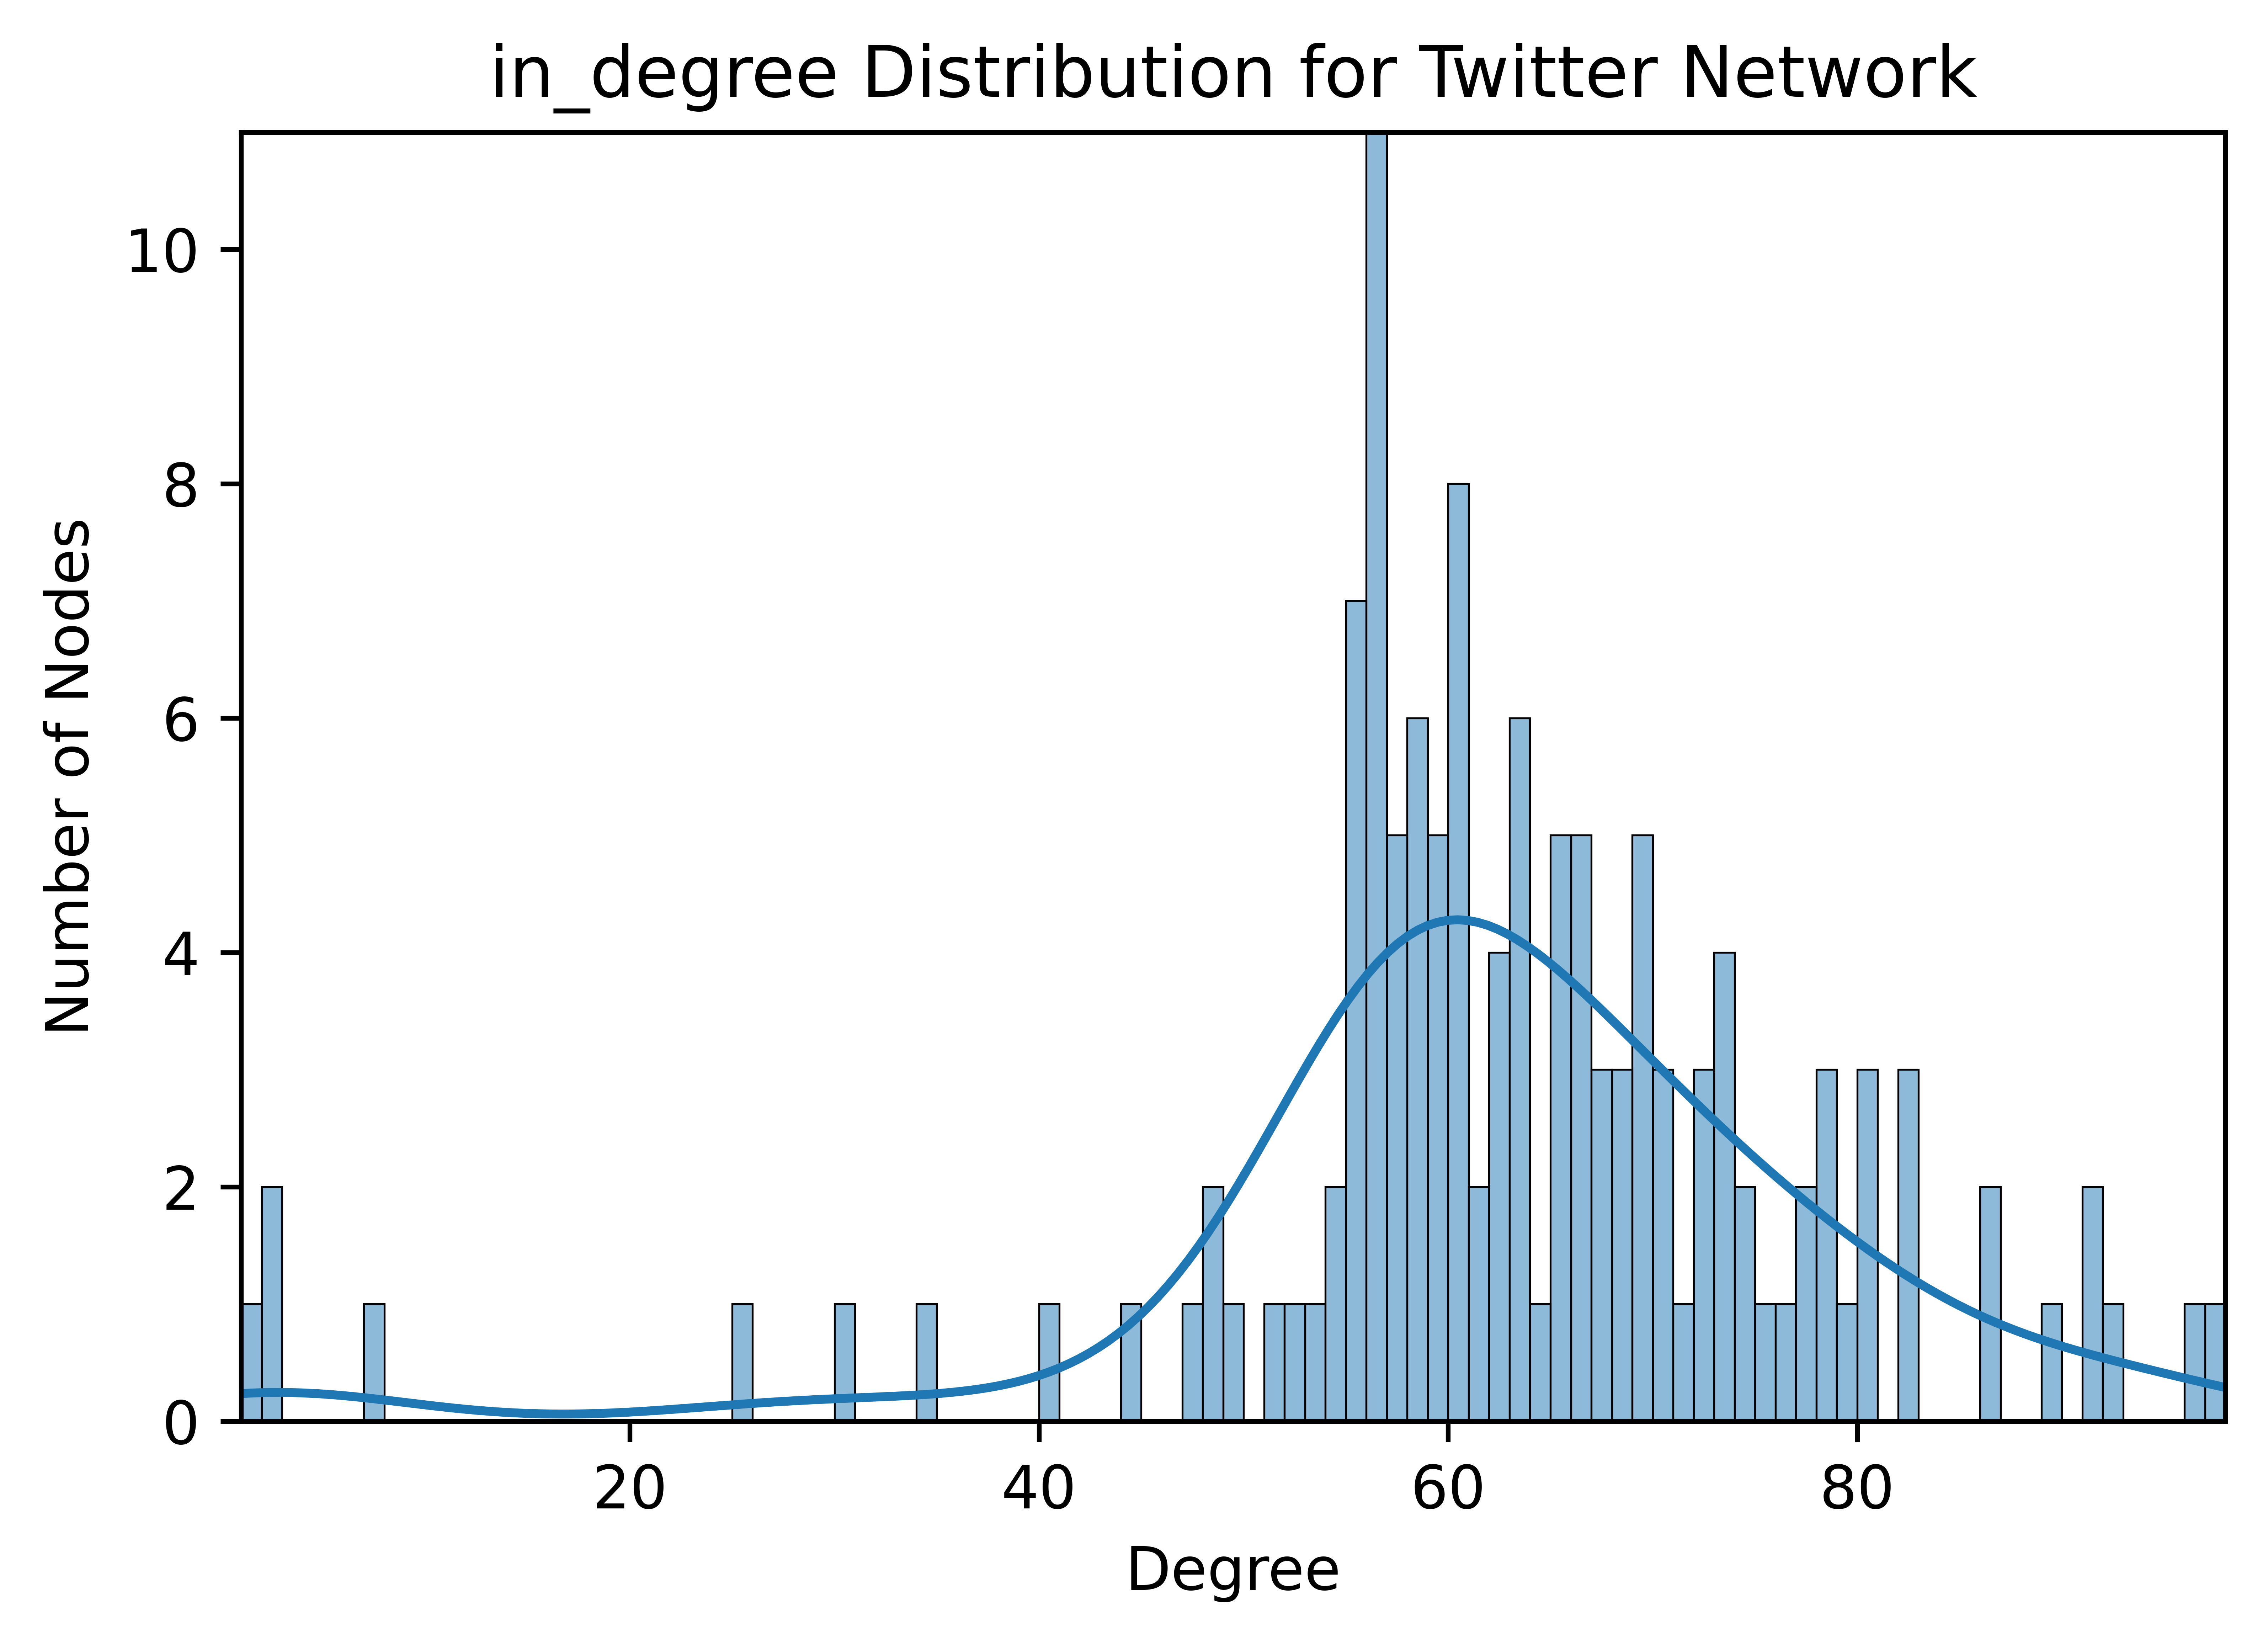

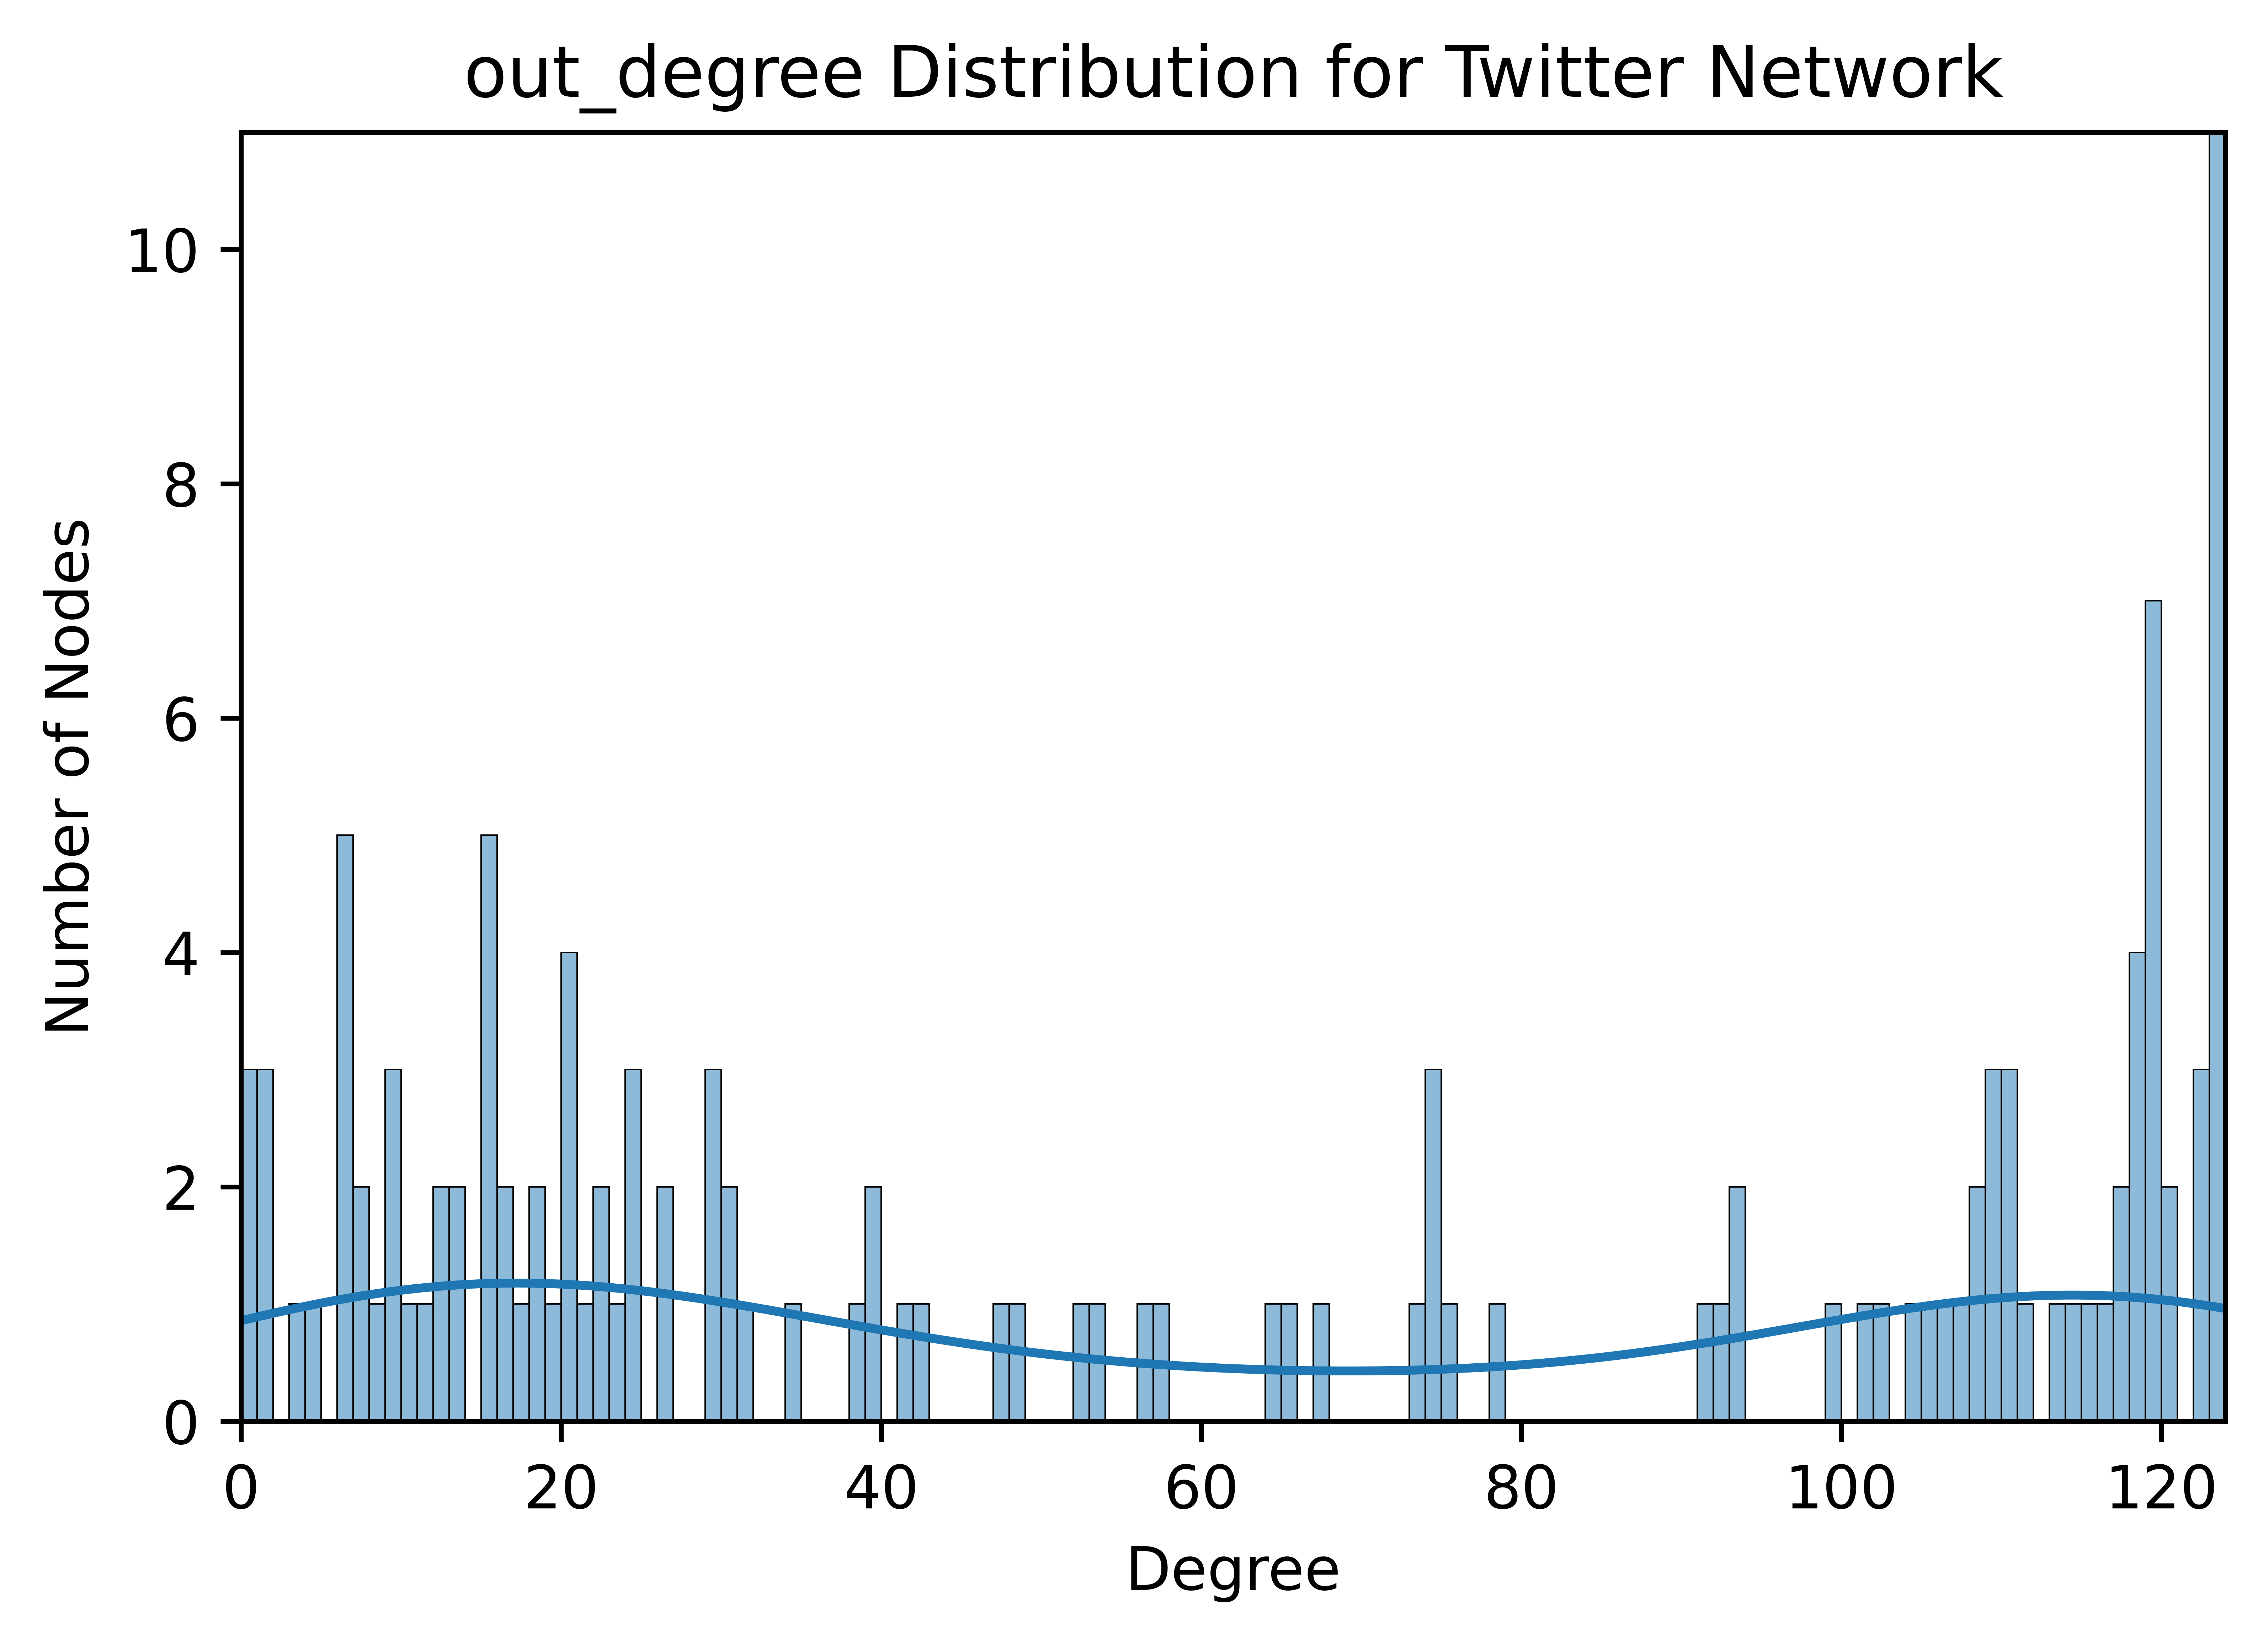

In [10]:
# For twitter network
types = ['in_degree', 'out_degree']
for type in types:
    plot_save_degree_dist(graphTwitter, "Twitter", type)

## Question B
### According to the degree distribution, what is the main difference between the chosen network and a random network with the same number of nodes? What may cause the difference?

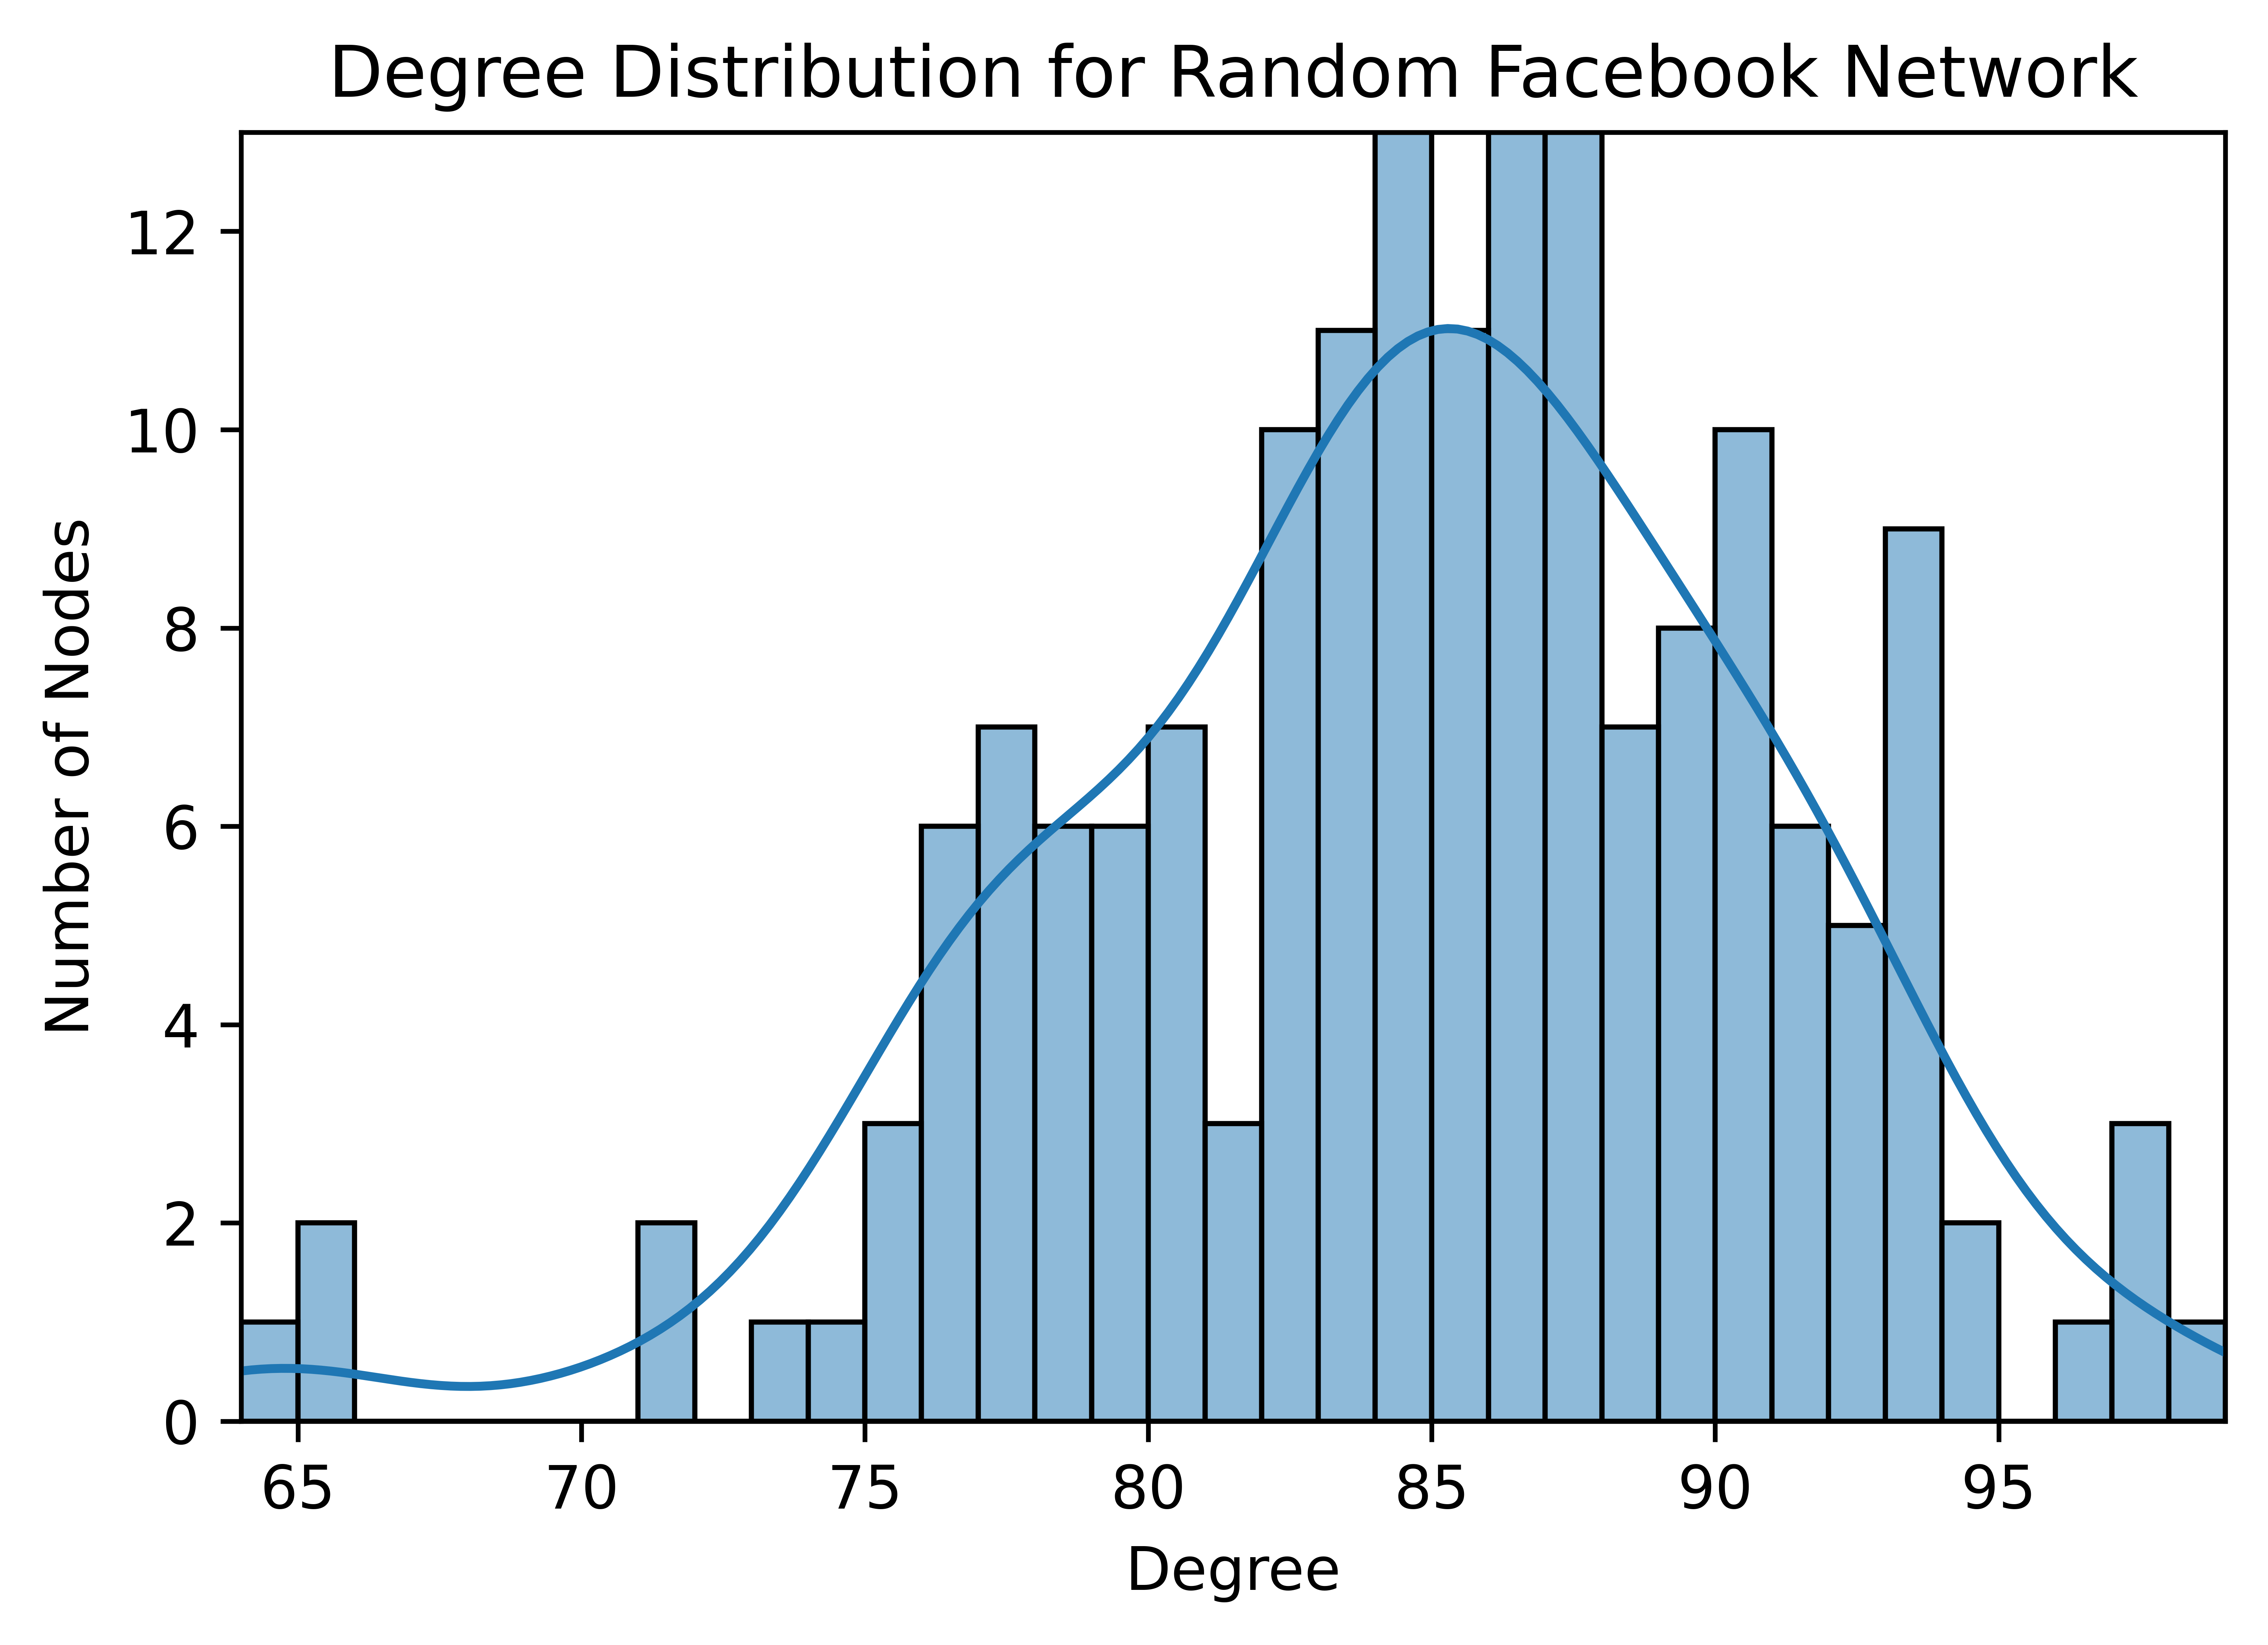

In [12]:
# For Facebook Network
random_graphFacebook = nx.erdos_renyi_graph(n=graphFacebook.number_of_nodes(),p=0.5,directed=False)
plot_save_degree_dist(random_graphFacebook, "Random Facebook", "")


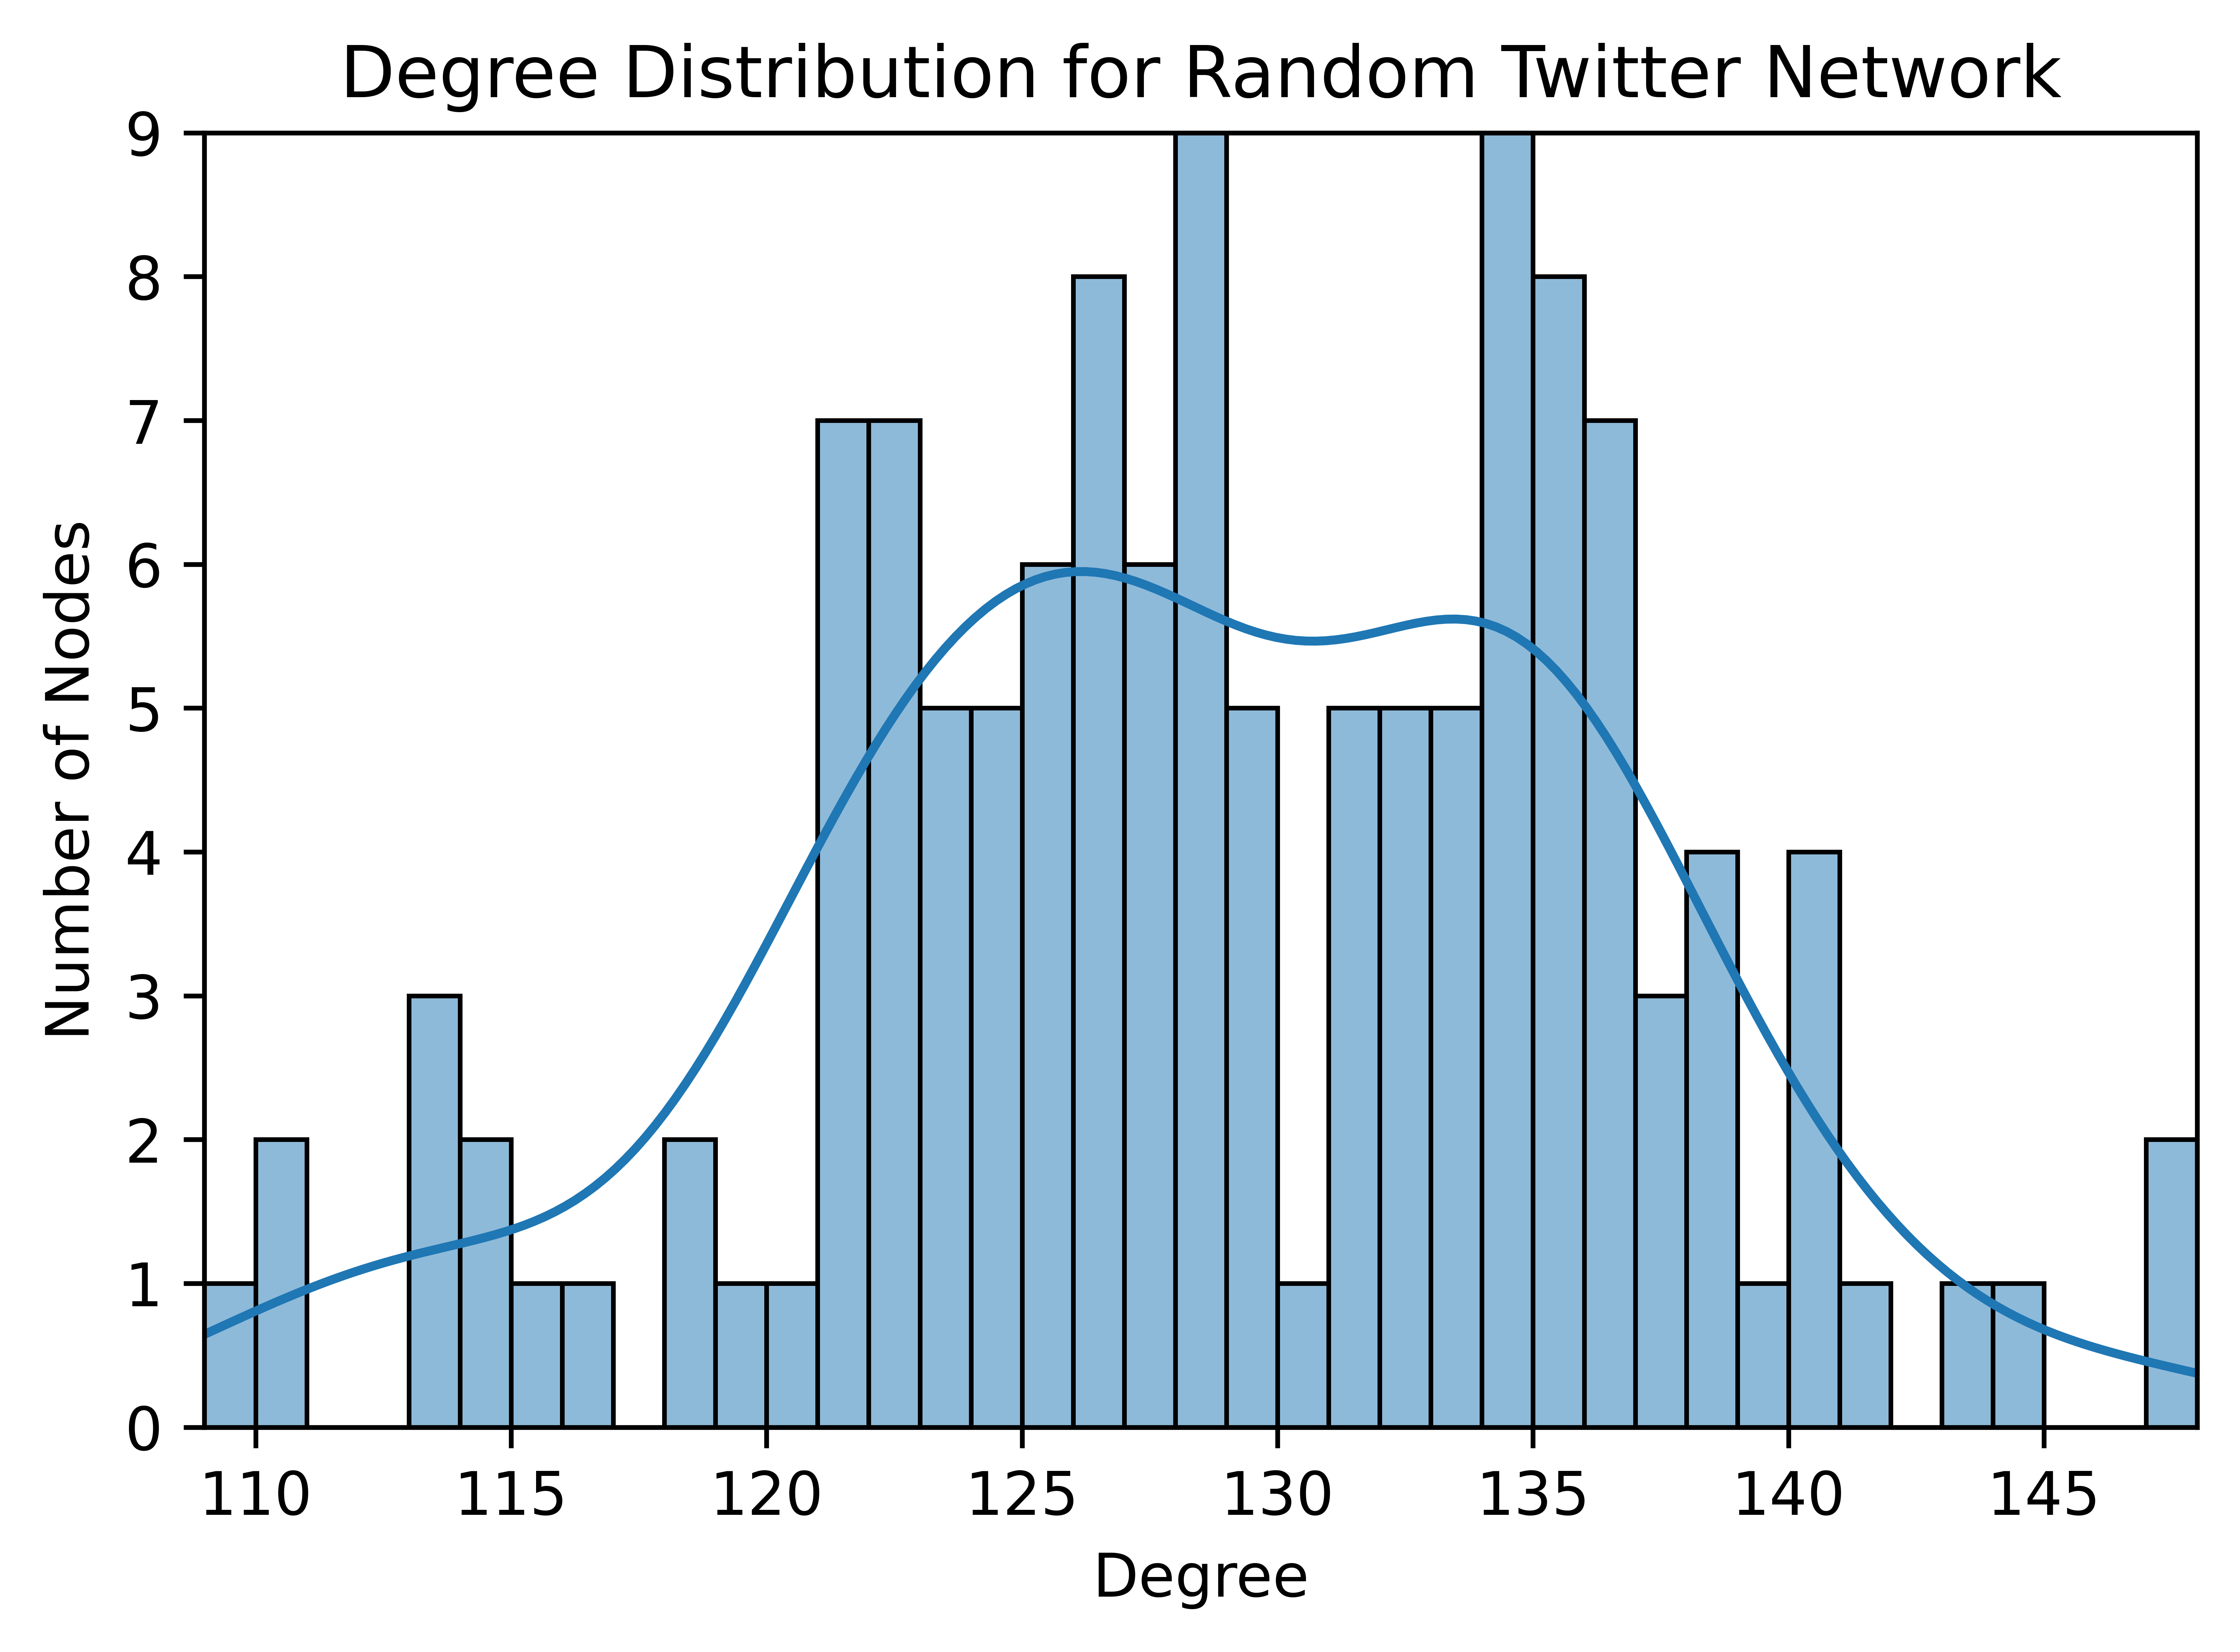

In [14]:
# For Twitter Network
random_graphTwitter = nx.erdos_renyi_graph(n=graphTwitter.number_of_nodes(),p=0.5,directed=True)
plot_save_degree_dist(random_graphTwitter, "Random Twitter", "")

### According to the degree distribution, the main difference between the Facebook or Twitter network with the random network with the same number of nodes is that the random network is almost a normal distribution which is centered at the average degree. In the case of the real world networks i.e. facebook and twitter, we have most of the nodes having smaller degrees and just a very few outlier nodes having high degrees.

## Question C
#### Average path length of the network

In [15]:
# Function to return average path length of each network
def average_path_length(G, id):
    """_summary_
    For networkx documentation: The average shortest path length is the sum of path lengths d(u,v) 
    between all pairs of nodes (assuming the length is zero if v is not reachable from v) normalized 
    by n*(n-1) where n is the number of nodes in G.
    Args:
        G (_type_): Directed or Undirected Graph
        id (_type_): Name of the network. A string.

    Returns:
        _type_: A string
    """
    result = nx.average_shortest_path_length(G)
    return ("The average path length for {} Network is: {}".format(id, result))

In [16]:
print(average_path_length(graphFacebook, "Facebook"))
print(average_path_length(graphTwitter, "Twitter"))

The average path length for Facebook Network is: 2.4250784145993727
The average path length for Twitter Network is: 1.498485949612403


## Question D
### Randomly choose 5 nodes from the network, and calculate the clustering coefficients of these nodes, respectively.

In [17]:
sample(list(graphFacebook.nodes()), 5)

['706', '712', '806', '853', '774']

In [18]:
# Function for clustering coefficient
def calculate_clustering_coefficient(G, id):
    print("Calculating clustering coefficient for 5 random nodes in the {} network.".format(id))
    random_nodes = sample(list(G.nodes()), 5)
    for node in random_nodes:
        clus_coeff = nx.clustering(G, node)
        print("The clustering coefficient for node {} is --> {}".format(node, clus_coeff))
    

In [19]:
# For Facebook Network
calculate_clustering_coefficient(graphFacebook, "Facebook")

Calculating clustering coefficient for 5 random nodes in the Facebook network.
The clustering coefficient for node 776 is --> 0
The clustering coefficient for node 852 is --> 1.0
The clustering coefficient for node 831 is --> 0.5494505494505495
The clustering coefficient for node 817 is --> 0.5138339920948617
The clustering coefficient for node 709 is --> 0.675


In [20]:
# For Twitter Network
calculate_clustering_coefficient(graphTwitter, "Twitter")

Calculating clustering coefficient for 5 random nodes in the Twitter network.
The clustering coefficient for node 2020351 is --> 0.6432291666666666
The clustering coefficient for node 807095 is --> 0.5565453323088744
The clustering coefficient for node 16954517 is --> 0.6729673544810595
The clustering coefficient for node 10032112 is --> 0.572655690765927
The clustering coefficient for node 59157393 is --> 0.6944771847112309


## Question E
### What is the average clustering coefficient

In [21]:
def average_clustering_coefficient(G, id):
    avg_clust = nx.average_clustering(G)
    print("The average clustering coefficient for the {} Network is --> {}".format(id, avg_clust))

In [22]:
# For Facebook
average_clustering_coefficient(graphFacebook, 'Facebook')

# For Twitter
average_clustering_coefficient(graphTwitter, 'Twitter')

The average clustering coefficient for the Facebook Network is --> 0.5337913395248176
The average clustering coefficient for the Twitter Network is --> 0.6736358402180272


## Question F
### List the nodes which compose the largest component in the network

In [23]:
# For Facebook the undirected graph
largest_cc_facebook = max(nx.connected_components(graphFacebook), key=len)

# The nodes which compose the largest component in the Facebook Network
print(largest_cc_facebook)

{'854', '733', '778', '707', '703', '779', '851', '776', '759', '825', '827', '748', '755', '828', '700', '745', '709', '689', '711', '783', '730', '804', '716', '796', '789', '699', '736', '765', '741', '820', '728', '754', '802', '775', '722', '822', '806', '793', '821', '852', '723', '690', '725', '727', '691', '784', '757', '763', '752', '735', '760', '811', '798', '787', '697', '718', '715', '731', '762', '799', '770', '777', '773', '836', '706', '772', '737', '844', '767', '797', '850', '800', '831', '750', '785', '738', '747', '742', '840', '751', '756', '813', '810', '704', '795', '790', '769', '781', '833', '849', '719', '724', '815', '726', '837', '848', '823', '721', '788', '698', '819', '705', '694', '729', '845', '780', '803', '771', '701', '702', '832', '842', '774', '743', '761', '687', '846', '732', '838', '744', '791', '839', '710', '794', '856', '808', '812', '753', '814', '816', '766', '805', '782', '758', '824', '855', '720', '853', '708', '843', '749', '829', '734'

In [24]:
# For Twitther the directed graph
largest_cc_twitter = max(nx.strongly_connected_components(graphTwitter), key=len)
# The nodes which compose the largest component in the Twitter Network
print(largest_cc_twitter)

{'17003204', '16929470', '1754641', '14434070', '71180562', '17002185', '16929559', '16956234', '17003056', '17023277', '22411875', '21764343', '5758642', '14575107', '14434063', '54981205', '1440641', '70736745', '1774391', '1769551', '16954241', '17194349', '16954517', '103041418', '17025613', '17001646', '39434755', '59145948', '14940354', '17845620', '73223196', '17026041', '14237001', '11178672', '17001524', '16956330', '1767741', '17002395', '1766701', '59157393', '21145241', '4282171', '17026297', '54905488', '19787000', '17006157', '57046177', '20772763', '9089942', '26929440', '17023344', '1976841', '16929396', '17023178', '1775731', '16956008', '15827269', '16190278', '14603515', '17025323', '10755542', '17004618', '315142011', '1879831', '25878195', '807095', '9641832', '10874882', '56810507', '28631509', '16439603', '12685742', '20095865', '16686144', '16956087', '17004139', '16929282', '19662630', '1877831', '10032112', '17000625', '27916985', '15174477', '14515799', '1522